In [3]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Preparing CNN

In [4]:
# Initializing the CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 4, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
__________

# Data Augmentation

In [4]:

TRAIN_DIR = './split_sets/train'
TEST_DIR = './split_sets/val'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2846 images belonging to 4 classes.
Found 713 images belonging to 4 classes.


# Training

In [2]:

STEPS_PER_EPOCH = 100 # train_len/batch size
VALIDATION_STEPS = 25 # val_len/batch_size

MODEL_FILE = './ikea_model_CNN.h5'
#Saving the best model
mc = ModelCheckpoint(MODEL_FILE,monitor='val_acc',save_best_only=True, verbose=1)
callbacks_list = [mc]
history = model.fit_generator(train_generator,
                         steps_per_epoch = STEPS_PER_EPOCH,
                         epochs = 15,
                         validation_data = validation_generator,
                         validation_steps = VALIDATION_STEPS)
# model.save(MODEL_FILE)


## Training Accuracy = 80.64, Val Accuracy = 73.49

In [8]:
import matplotlib.pyplot as plt
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.plot( acc)
    plt.plot( val_acc)
    plt.legend(['train','val'])
    plt.title('Training and validation accuracy')
  
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['train','val'])
    plt.title('Training and validation loss')
    
    plt.show()
  


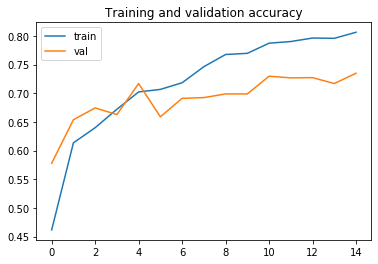

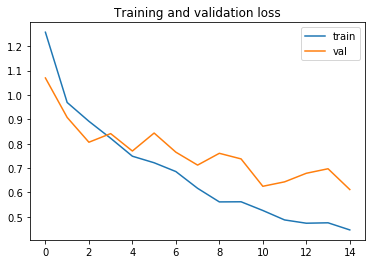

In [11]:
plot_training()

### Validation Score

In [13]:
m =  load_model('ikea_model_CNN.h5')

In [14]:
val_loss,val_accuracy = m.evaluate_generator(validation_generator,steps=25)
print('Val_Accuracy:','{:.2f}'.format(val_accuracy*100))
print('Val_Loss:','{:.2f}'.format(val_loss))

Val_Accuracy: 73.23
Val_Loss: 0.64
